In [32]:
    #Source: https://github.com/slundberg/shap/blob/master/notebooks/image_examples/image_classification/Explain%20an%20Intermediate%20Layer%20of%20VGG16%20on%20ImageNet%20(PyTorch).ipynb
    import torch, torchvision
    from torch import nn
    from torchvision import transforms, models, datasets
    import shap
    import json
    import numpy as np
    import random

In [33]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

In [34]:
# load the model
model = models.alexnet(pretrained=True).eval()

In [35]:
# Import ImageNet Dataset and transform values
X,y = shap.datasets.imagenet50()
#X /= 255

# Select some random ImageNet Pictures from Shap Dataset
picture_index = random.sample(range(0,50),2)

to_explain = X[picture_index]

In [36]:
# Run GradientExplainer
e = shap.GradientExplainer(model, normalize(X),local_smoothing=0.5)
shap_values,indexes = e.shap_values(normalize(to_explain), ranked_outputs=1, nsamples=200)

In [37]:
print(type(indexes))

<class 'torch.Tensor'>


In [38]:
# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
    

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

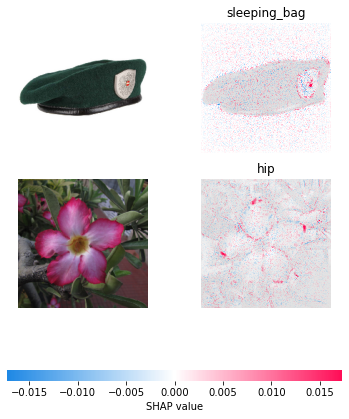

In [39]:
# plot the explanations
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

shap.image_plot(shap_values, to_explain, index_names)